In [165]:
#🦚
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [166]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [167]:
print(tf.__version__)

2.17.0


In [168]:
import molgrid
import numpy as np
import tensorflow.keras as keras
import keras.layers
import os
import matplotlib.pyplot as plt

In [169]:
molgrid.set_random_seed(0)
np.random.seed(0)
batch_size = 50
datadir = os.getcwd() +'/_data'
fname = datadir+"/small.types"

In [170]:
def create_model(dims):
    """ Creates a 3D CNN by defining and applying layers simultaneously. """
    input_layer = keras.layers.Input(shape=dims)
    pool0 = keras.layers.MaxPooling3D(data_format="channels_first")(input_layer)
    conv1 = keras.layers.Conv3D(filters=32, kernel_size=3, data_format="channels_first", activation="relu")(pool0)
    pool1 = keras.layers.MaxPooling3D(data_format="channels_first")(conv1)
    conv2 = keras.layers.Conv3D(filters=64, kernel_size=3, data_format="channels_first", activation="relu")(pool1)
    pool2 = keras.layers.MaxPooling3D(data_format="channels_first")(conv2)
    conv3 = keras.layers.Conv3D(filters=128, kernel_size=3, data_format="channels_first", activation="relu")(pool2)

    flatten = keras.layers.Flatten(data_format="channels_first")(conv3)

    fc1 = keras.layers.Dense(2,activation='softmax')(flatten)

    # Define and return model
    model = keras.models.Model(inputs=input_layer, outputs=fc1)
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="Netsparse_categorical_crossentropy")

    return model

In [171]:
e = molgrid.ExampleProvider(data_root=datadir+"/structs",balanced=True,shuffle=True)
e

In [172]:
e.populate(fname)
list(e.get_type_names())

['0_AliphaticCarbonXSHydrophobe',
 '0_AliphaticCarbonXSNonHydrophobe',
 '0_AromaticCarbonXSHydrophobe',
 '0_AromaticCarbonXSNonHydrophobe',
 '0_Bromine_Iodine_Chlorine_Fluorine',
 '0_Nitrogen_NitrogenXSAcceptor',
 '0_NitrogenXSDonor_NitrogenXSDonorAcceptor',
 '0_Oxygen_OxygenXSAcceptor',
 '0_OxygenXSDonorAcceptor_OxygenXSDonor',
 '0_Sulfur_SulfurAcceptor',
 '0_Phosphorus',
 '0_Calcium',
 '0_Zinc',
 '0_GenericMetal_Boron_Manganese_Magnesium_Iron',
 '1_AliphaticCarbonXSHydrophobe',
 '1_AliphaticCarbonXSNonHydrophobe',
 '1_AromaticCarbonXSHydrophobe',
 '1_AromaticCarbonXSNonHydrophobe',
 '1_Bromine_Iodine',
 '1_Chlorine',
 '1_Fluorine',
 '1_Nitrogen_NitrogenXSAcceptor',
 '1_NitrogenXSDonor_NitrogenXSDonorAcceptor',
 '1_Oxygen_OxygenXSAcceptor',
 '1_OxygenXSDonorAcceptor_OxygenXSDonor',
 '1_Sulfur_SulfurAcceptor',
 '1_Phosphorus',
 '1_GenericMetal_Boron_Manganese_Magnesium_Zinc_Calcium_Iron']

In [173]:
e.num_labels()

3

In [174]:
e.num_types()

28

In [175]:
e.next()

In [176]:
gmaker = molgrid.GridMaker()
gmaker

In [177]:
dims = gmaker.grid_dimensions(e.num_types())
dims

(28, 48, 48, 48)

In [178]:
tensor_shape = (batch_size,)+dims
tensor_shape

(50, 28, 48, 48, 48)

In [179]:
model = create_model(dims)
model

2024-08-09 12:45:56.653704: W external/local_tsl/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 864.0KiB (rounded to 884736)requested by op StatelessRandomUniformV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-08-09 12:45:56.653761: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-08-09 12:45:56.653784: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 52, Chunks in use: 52. 13.0KiB allocated for chunks. 13.0KiB in use in bin. 3.2KiB client-requested in use in bin.
2024-08-09 12:45:56.653799: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 6, Chunks in use: 6. 3.0KiB allocated for chunks. 3.0KiB in use in bin. 3.0KiB client-requested in use in bin.
2024-08-09 12

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3,3,3,64,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 

In [ ]:
labels = molgrid.MGrid1f(batch_size)
labels

In [ ]:
molgrid.get_gpu_device()

In [136]:
molgrid.get_gpu_enabled()

True

In [137]:
print(dir(molgrid))

['AtomTyper', 'BatchedCoords2GridFunction', 'C', 'CartesianGrid', 'CoordCache', 'CoordinateSet', 'CoordinateSetVec', 'Coords2Grid', 'Coords2GridFunction', 'DoublePtr', 'ElementIndexTyper', 'Example', 'ExampleDataset', 'ExampleProvider', 'ExampleProviderSettings', 'ExampleVec', 'FileAtomMapper', 'FileMappedElementTyper', 'FileMappedGninaTyper', 'FloatPtr', 'FloatVec', 'GninaIndexTyper', 'GninaVectorTyper', 'Grid1d', 'Grid1dCUDA', 'Grid1f', 'Grid1fCUDA', 'Grid2CoordsGradientFunction', 'Grid2d', 'Grid2dCUDA', 'Grid2f', 'Grid2fCUDA', 'Grid3d', 'Grid3dCUDA', 'Grid3f', 'Grid3fCUDA', 'Grid4d', 'Grid4dCUDA', 'Grid4f', 'Grid4fCUDA', 'Grid5d', 'Grid5dCUDA', 'Grid5f', 'Grid5fCUDA', 'Grid6d', 'Grid6dCUDA', 'Grid6f', 'Grid6fCUDA', 'Grid7d', 'Grid7dCUDA', 'Grid7f', 'Grid7fCUDA', 'Grid8d', 'Grid8dCUDA', 'Grid8f', 'Grid8fCUDA', 'GridInterpolater', 'GridMaker', 'IterationScheme', 'MGrid1d', 'MGrid1f', 'MGrid2d', 'MGrid2f', 'MGrid3d', 'MGrid3f', 'MGrid4d', 'MGrid4f', 'MGrid5d', 'MGrid5f', 'MGrid6d', 'MG

In [142]:
input_tensor = molgrid.Grid5f(*tensor_shape)
input_tensor

ArgumentError: Python argument types in
    Grid5fCUDA.__init__(Grid5fCUDA, int, int, int, int, int)
did not match C++ signature:
    __init__(_object*, libmolgrid::Grid<float, 5ul, true>)
    __init__(_object*, Pointer<float>, unsigned int, unsigned int, unsigned int, unsigned int, unsigned int)

In [139]:
losses = []
# train for 500 iterations
for iteration in range(10):
    # load data
    batch = e.next_batch(batch_size)

    gmaker.forward(batch, input_tensor, 0, random_rotation=True)
    batch.extract_label(0, labels)

    loss = model.train_on_batch(input_tensor.tonumpy(), labels.tonumpy())
    losses.append(float(loss))
    

RuntimeError: Could not allocate 619315200 bytes of GPU memory in ManagedGrid

In [140]:
%matplotlib inline

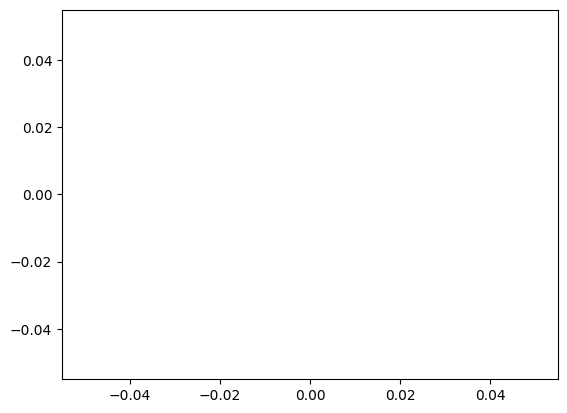

In [141]:
plt.plot(losses)